<a href="https://colab.research.google.com/github/yusptar/PCVK/blob/main/PCVK_Modul-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
import cv2 as cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
import glob

Mounted at /content/drive


 Gamma Correction pada citra 
--------------------------------
Masukkan nilai Gamma: 3


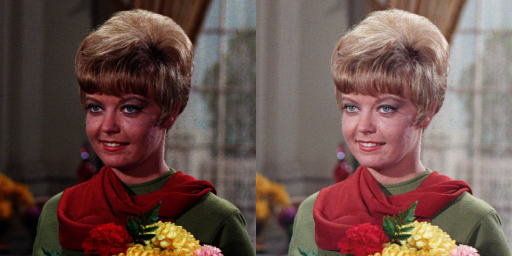

In [ ]:
# Gamma Correction
print(' Gamma Correction pada citra ')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

original = cv2.imread('/content/drive/MyDrive/female.tiff')
gamma_image = gammaCorrection(original, 2.2)

final_frame = cv2.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
--------------------------------
Masukkan nilai bit depth: 5


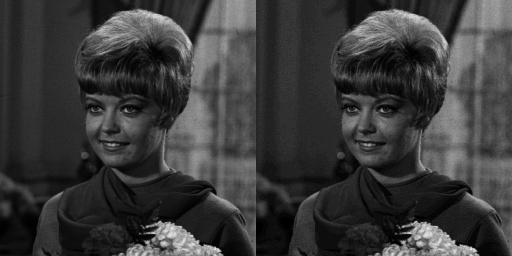

In [ ]:
# Depth Image
print(' Simulasi Image Depth ')
print('--------------------------------')

original = cv2.imread('/content/drive/MyDrive/female.tiff', cv2.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

try:
  bit = int(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

level = 255 / (2**bit)-1

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv2.hconcat((original, depth_image))
cv2_imshow(final_frame)


In [4]:
# Average Denoising
from math import log10, sqrt

original = cv2.imread('/content/drive/MyDrive/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/noises/*.jpg'):
      n = cv2.imread(img)
      cv_img.append(n)

 Average Denoising 
--------------------------------
PSNR value 27.523010122922294 (dB)


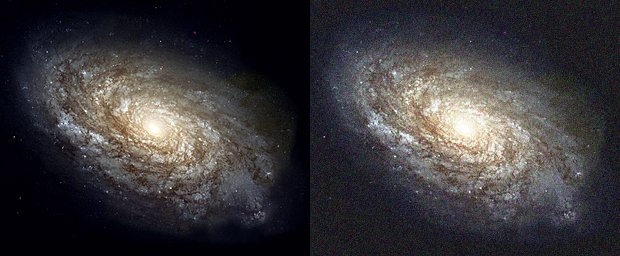

In [7]:
print(' Average Denoising ')
print('--------------------------------')
dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value',psnr,'(dB)')
galaxy_frame = cv2.hconcat((original, dst))
cv2_imshow(galaxy_frame)


Citra 30
----------
PSNR value 27.520124385150602 (dB)


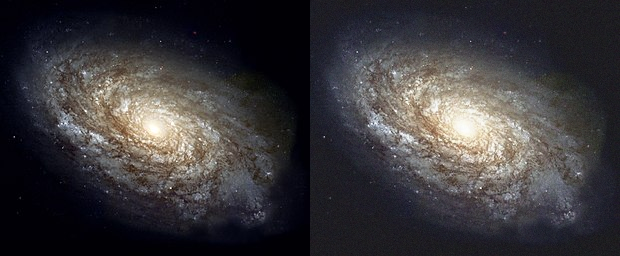

----------
Citra 60
----------
PSNR value 27.488665151448707 (dB)


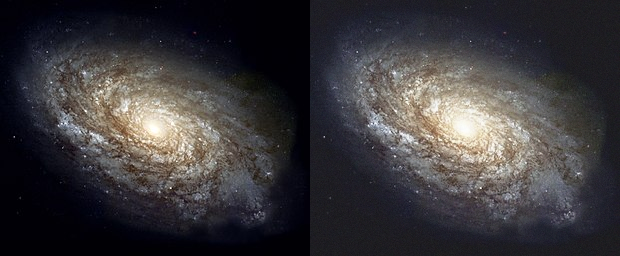

----------
Citra 80
----------
PSNR value 27.507458687026194 (dB)


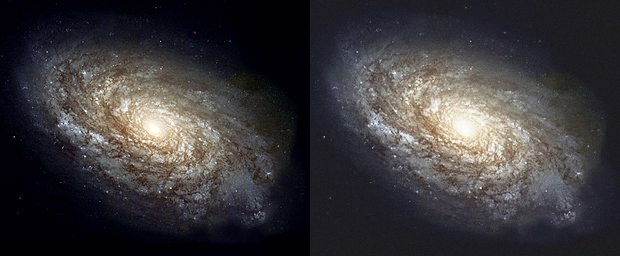

----------
Citra 100
----------
PSNR value 27.511208193611523 (dB)


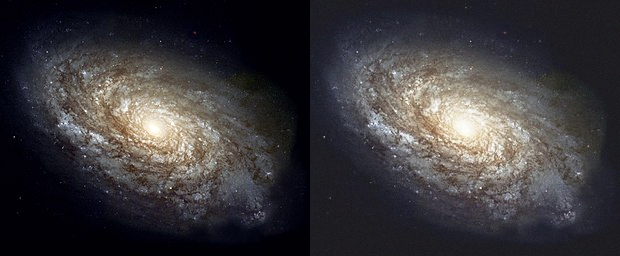

In [12]:
print('Citra 30')
print('----------')
dst = cv_img[0]
noise_number = 29 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value',psnr,'(dB)')
galaxy_frame = cv2.hconcat((original, dst))
cv2_imshow(galaxy_frame)

print('----------')
print('Citra 60')
print('----------')

dst = cv_img[0]
noise_number = 59 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value',psnr,'(dB)')
galaxy_frame = cv2.hconcat((original, dst))
cv2_imshow(galaxy_frame)

print('----------')
print('Citra 80')
print('----------')

dst = cv_img[0]
noise_number = 79 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value',psnr,'(dB)')
galaxy_frame = cv2.hconcat((original, dst))
cv2_imshow(galaxy_frame)

print('----------')
print('Citra 100')
print('----------')

dst = cv_img[0]
noise_number = 99 
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv2.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('PSNR value',psnr,'(dB)')
galaxy_frame = cv2.hconcat((original, dst))
cv2_imshow(galaxy_frame)

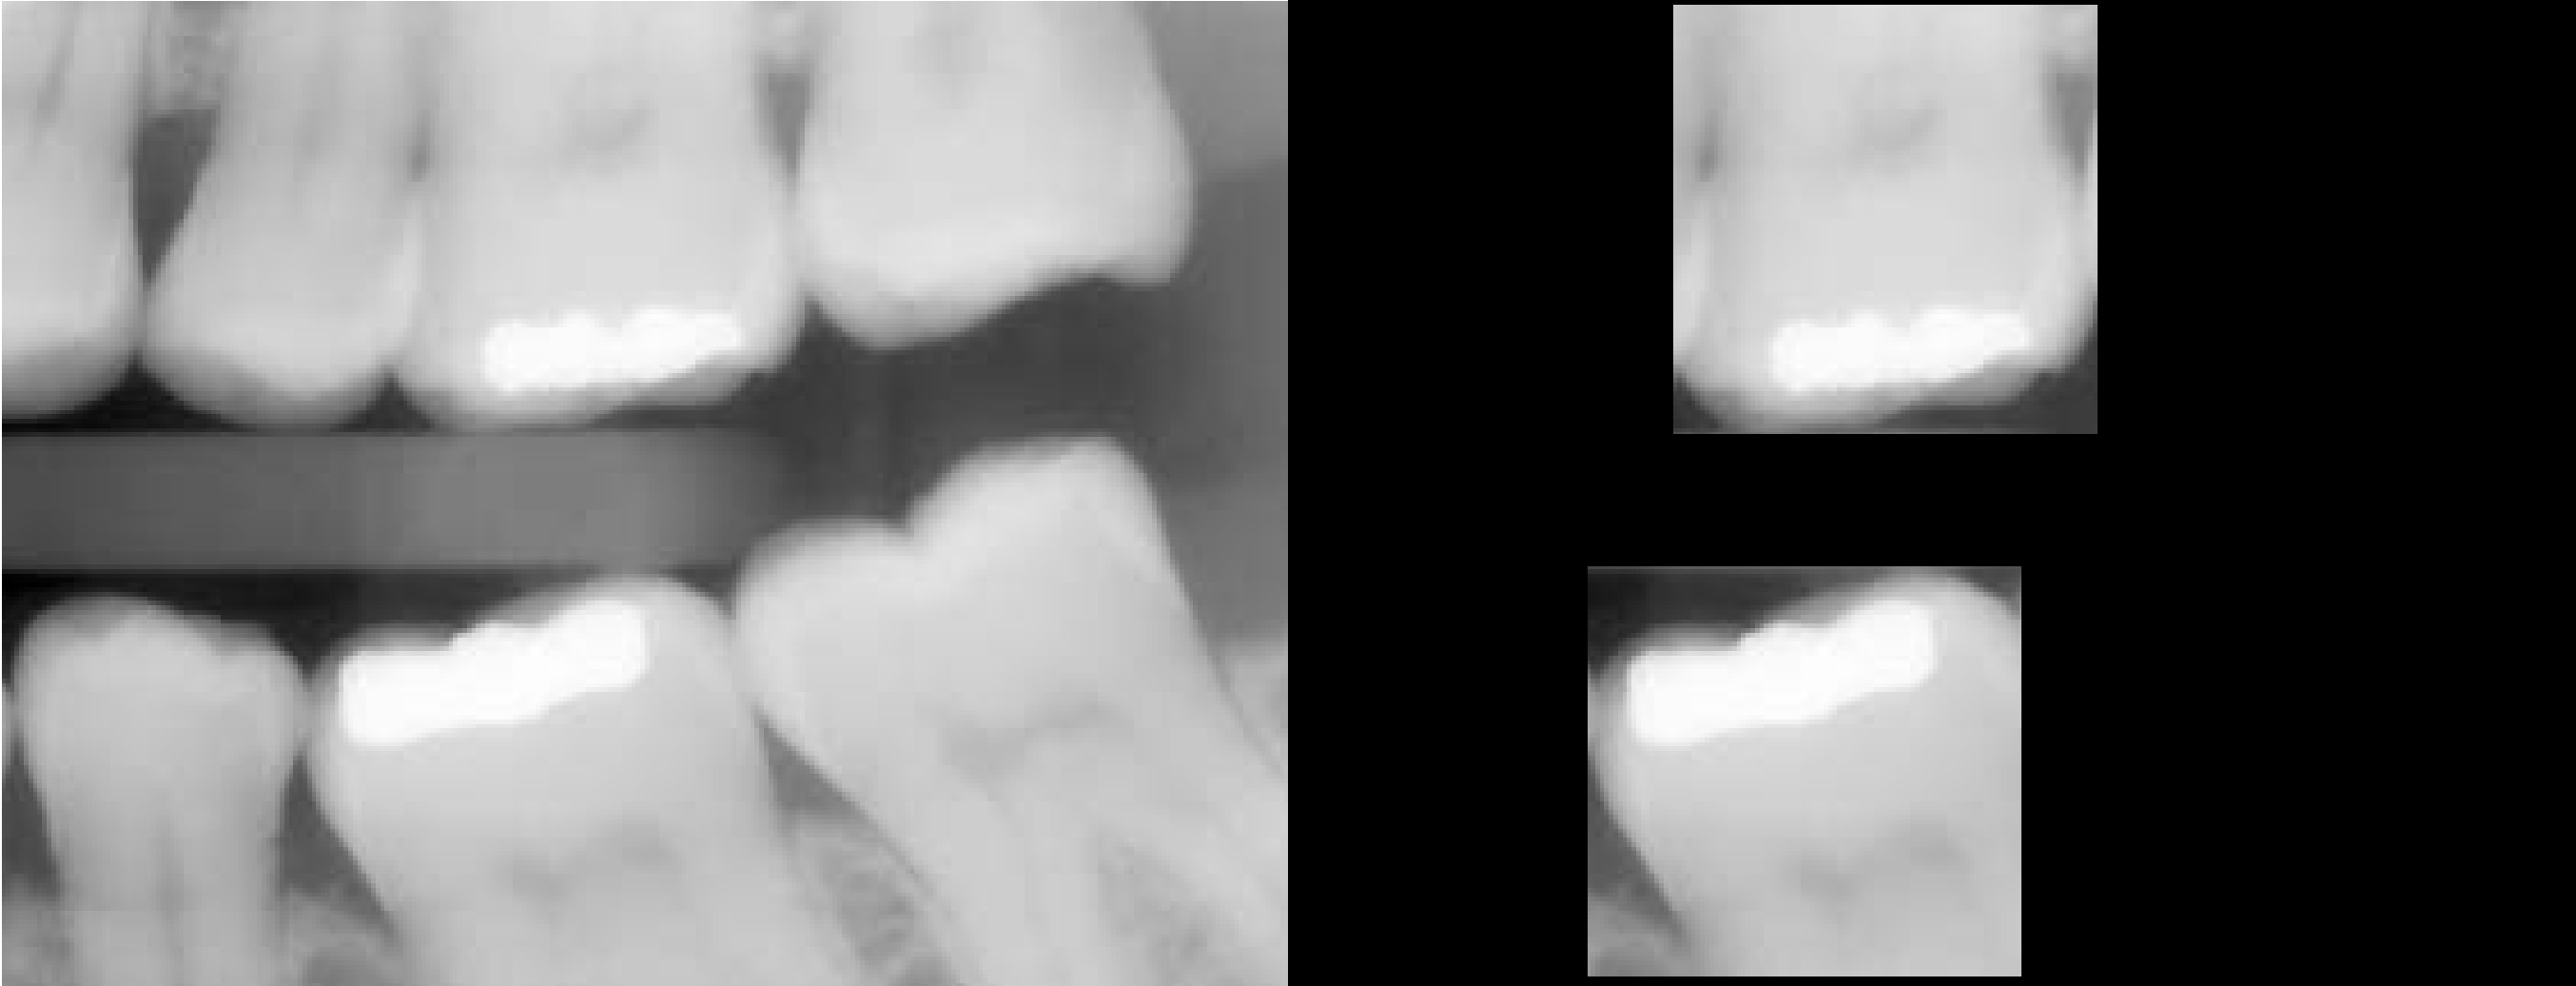

In [13]:
img = cv2.imread('/content/drive/MyDrive/teeth.jpg')

mask = np.zeros(img .shape, dtype=np.uint8)
mask = cv2.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)

result = img & mask

mask1 = cv2.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)

result = img & mask1

teeth_frame = cv2.hconcat((img, result))
cv2_imshow(teeth_frame)

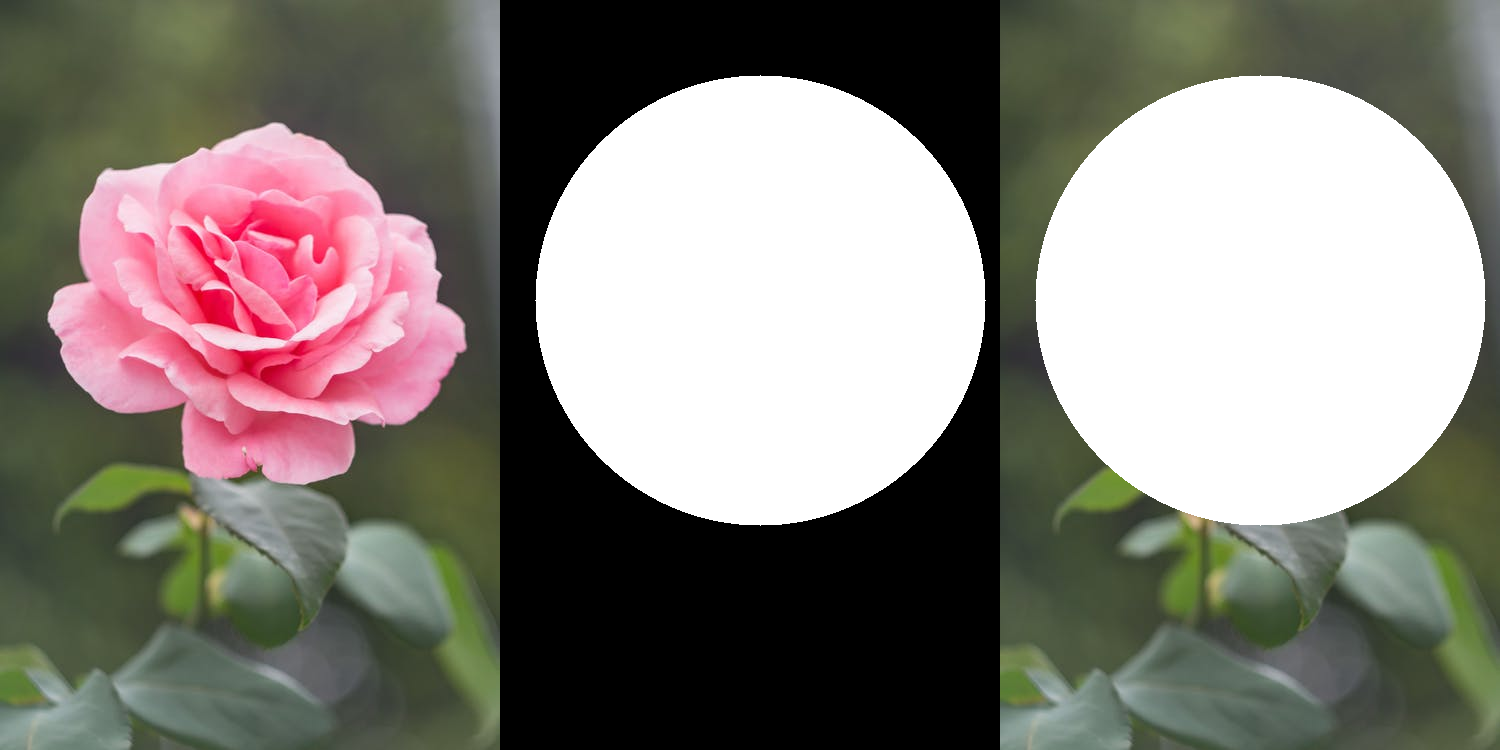

In [14]:
# OR
img_rose = cv2.imread('/content/drive/MyDrive/rose_pink.png')
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv2.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose | mask

rose_frame = cv2.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

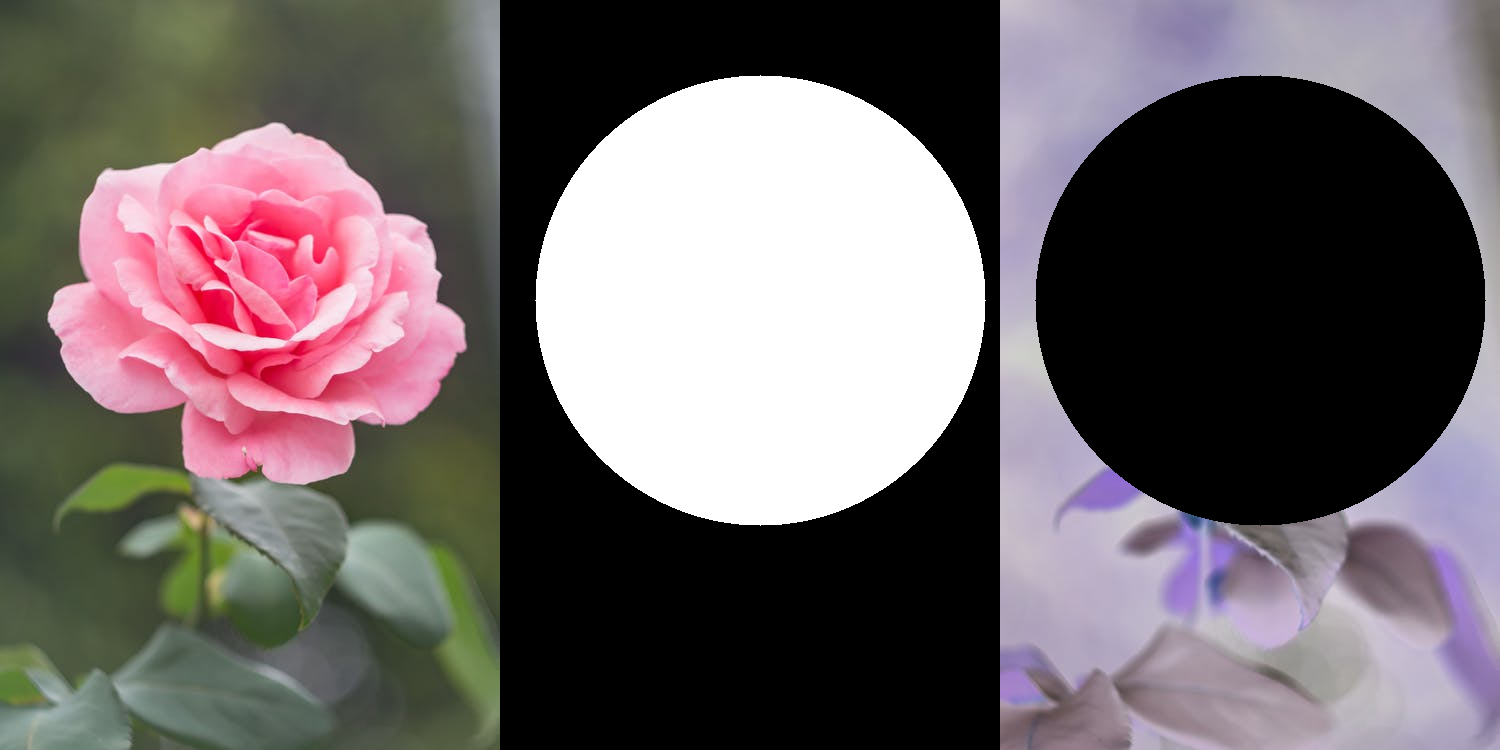

In [15]:
#NOT
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv2.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & ~mask

rose_frame = cv2.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

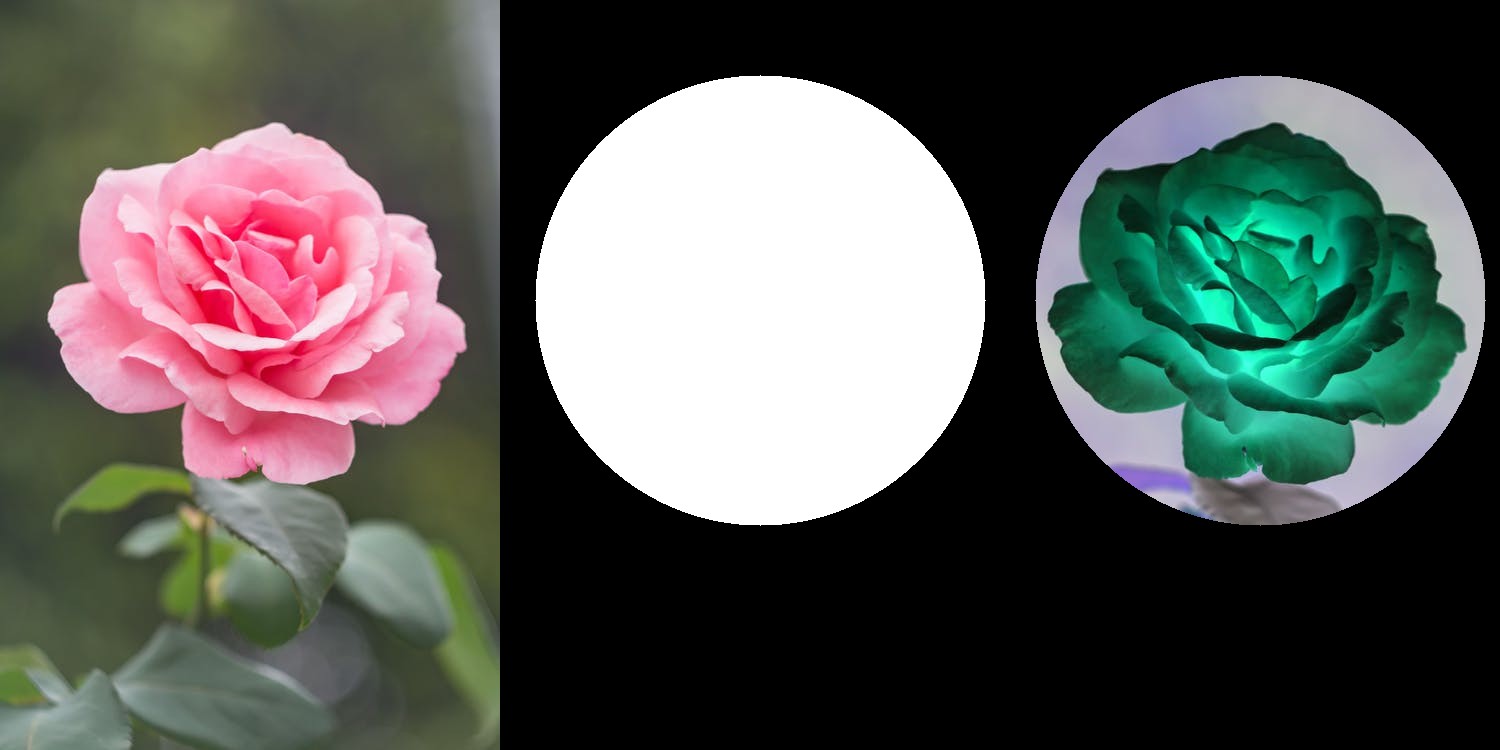

In [16]:
#NAND
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv2.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = ~img_rose & mask

rose_frame = cv2.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)

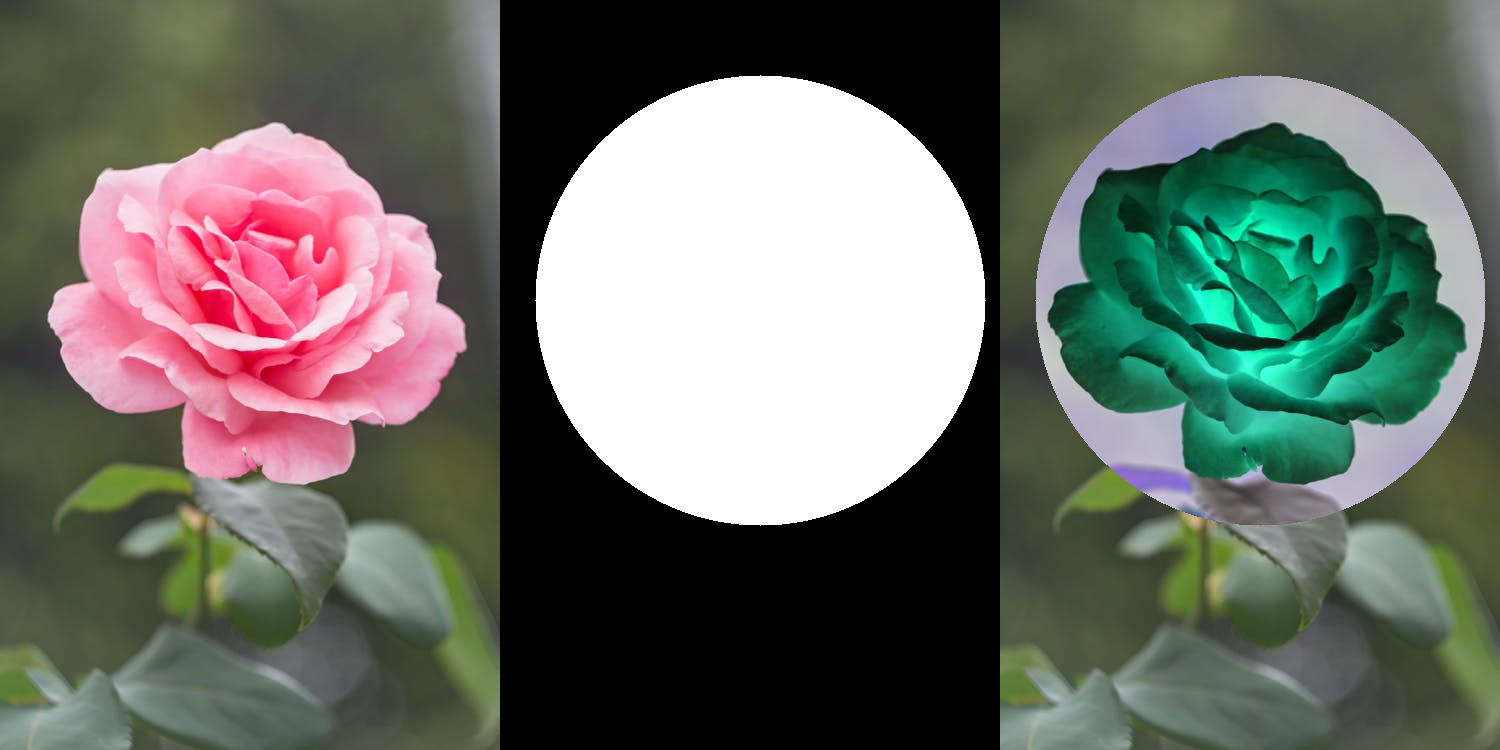

In [17]:
#XOR
mask = np.zeros(img_rose.shape, dtype=np.uint8)
mask = cv2.circle(mask, (260, 300), 225, (255,255,255), -1)

masked = img_rose ^ mask

rose_frame = cv2.hconcat((img_rose, mask, masked))
cv2_imshow(rose_frame)